In [40]:
%%capture
!pip install ssqueezepy
!pip install timm
!pip install pytorch-lightning

In [41]:
import mne
import pandas as pd
import os
path = r'Aanand_19_01.csv'
sfreq = 120
#ch_names = ['Fp2', 'F4', 'F8', 'T8', 'Fp1', 'F3', 'F7', 'T7', 'Cz',
#            'C4', 'P4', 'O2', 'Pz', 'C3', 'P3', 'O1','stim']
df = pd.read_csv(path)
df.head()

,timestamps,Fp1,Fp2,C3,C4,P7,P8,O1,O2,F7,F8,F3,F4,T7,T8,P3,P4,stim,sfreq
0,1.709562e+09,-37315.566816,-37971.501109,-44301.649249,-39326.821485,-38091.932308,-42685.081683,-39995.362162,-45340.603035,-46383.580134,-44207.906033,-45612.847282,-82818.845847,-47694.107615,-55704.123462,-46313.172139,-56584.022234,0.0,125
1,1.709562e+09,-74676.597080,-75963.789340,-88632.936911,-78996.697545,-76203.310633,-85438.559704,-80021.703842,-90723.853198,-94142.060774,-87977.807281,-89926.566473,-114472.134646,-94306.346095,-180493.242203,-93103.375209,-106202.749157,0.0,125
2,1.709562e+09,-70195.832276,-71380.295918,-84370.906278,-75097.167503,-71921.431651,-81097.135675,-75507.679642,-86529.682461,-93178.342960,-84785.575841,-86176.167271,-113766.713591,-90730.156389,-180578.938792,-89466.031130,-104809.877850,0.0,125
3,1.709562e+09,-75372.898623,-76687.985860,-89306.842006,-79372.072741,-76887.944566,-86097.712648,-80749.387234,-91372.679636,-93151.386756,-85667.352160,-87404.350925,-113962.917204,-91830.532769,-180690.921031,-90602.080894,-105176.401755,0.0,125
4,1.709562e+09,-71427.502802,-72627.389148,-85527.877274,-76314.622320,-73081.621299,-82298.899567,-76746.994465,-87678.472719,-94171.565076,-87515.394391,-89263.390215,-114363.102837,-93716.796484,-180443.084889,-92489.417492,-106010.837079,0.0,125


In [42]:
temp = df.drop('stim', axis=1)

In [43]:
df = temp.drop('sfreq', axis=1)

In [44]:
df.head()

,timestamps,Fp1,Fp2,C3,C4,P7,P8,O1,O2,F7,F8,F3,F4,T7,T8,P3,P4
0,1.709562e+09,-37315.566816,-37971.501109,-44301.649249,-39326.821485,-38091.932308,-42685.081683,-39995.362162,-45340.603035,-46383.580134,-44207.906033,-45612.847282,-82818.845847,-47694.107615,-55704.123462,-46313.172139,-56584.022234
1,1.709562e+09,-74676.597080,-75963.789340,-88632.936911,-78996.697545,-76203.310633,-85438.559704,-80021.703842,-90723.853198,-94142.060774,-87977.807281,-89926.566473,-114472.134646,-94306.346095,-180493.242203,-93103.375209,-106202.749157
2,1.709562e+09,-70195.832276,-71380.295918,-84370.906278,-75097.167503,-71921.431651,-81097.135675,-75507.679642,-86529.682461,-93178.342960,-84785.575841,-86176.167271,-113766.713591,-90730.156389,-180578.938792,-89466.031130,-104809.877850
3,1.709562e+09,-75372.898623,-76687.985860,-89306.842006,-79372.072741,-76887.944566,-86097.712648,-80749.387234,-91372.679636,-93151.386756,-85667.352160,-87404.350925,-113962.917204,-91830.532769,-180690.921031,-90602.080894,-105176.401755
4,1.709562e+09,-71427.502802,-72627.389148,-85527.877274,-76314.622320,-73081.621299,-82298.899567,-76746.994465,-87678.472719,-94171.565076,-87515.394391,-89263.390215,-114363.102837,-93716.796484,-180443.084889,-92489.417492,-106010.837079


In [45]:
eeg_data = df.iloc[:,1:18].values.T
eeg_data[:-1] = eeg_data[:-1] * (10*(-6))
eeg_data[:-1] = eeg_data[:-1] / 4

ch_names = ['Fp1',	'Fp2'	,'C3'	,'C4'	,'P7'	,'P8'	,'O1'	,'O2'	,'F7'	,'F8'	,'F3'	,'F4'	,'T7'	,'T8'	,'P3'	,'P4']
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = ( ["eeg" ]*16))
raw = mne.io.RawArray(eeg_data, info)

Creating RawArray with float64 data, n_channels=16, n_times=65257
    Range : 0 ... 65256 =      0.000 ...   543.800 secs
Ready.


In [46]:
raw.set_eeg_reference()
#raw.filter(l_freq=1,h_freq=28)

duration = 2

epochs=mne.make_fixed_length_epochs(raw, duration = duration, overlap=0)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Not setting metadata
271 matching events found
No baseline correction applied
0 projection items activated


In [48]:
epochs.drop_bad()  # This will drop bad epochs
num_epochs = len(epochs)
print("Total number of epochs created:", num_epochs)

Using data from preloaded Raw for 271 events and 240 original time points ...
0 bad epochs dropped
Total number of epochs created: 271


In [49]:
epochs.get_data()

Using data from preloaded Raw for 271 events and 240 original time points ...


array([[[-8.71329030e+04, -1.90474917e+05, -2.10620077e+05, ...,
         -2.00078559e+05, -1.80058506e+05, -2.16037755e+05],
        [-7.72938886e+04, -1.71167033e+05, -1.92853123e+05, ...,
         -1.81325892e+05, -1.59861470e+05, -1.97788002e+05],
        [ 1.76583335e+04,  1.88701809e+04,  2.00603274e+03, ...,
          1.19903223e+04,  2.88279333e+04, -3.69729984e+03],
        ...,
        [ 1.88695447e+05,  1.39677476e+06,  1.44512652e+06, ...,
          1.44861115e+06,  1.40211576e+06,  1.43941514e+06],
        [ 4.78311769e+04,  8.59267553e+04,  7.84329055e+04, ...,
          6.16923318e+04,  6.77776362e+04,  9.44635152e+04],
        [-7.03450427e+05, -1.41682662e+06, -1.36836744e+06, ...,
         -1.36788514e+06, -1.41460852e+06, -1.37508210e+06]],

       [[-1.78063605e+05, -2.02863245e+05, -1.99635843e+05, ...,
         -1.88165534e+05, -1.90733700e+05, -2.10012582e+05],
        [-1.57993303e+05, -1.83549326e+05, -1.80844955e+05, ...,
         -1.68288352e+05, -1.70526605e

In [50]:
def extract_psd_features(epochs):
    psds, freqs = mne.time_frequency.psd_array_multitaper(epochs,120 , fmin=1, fmax=30, n_jobs=1)
    # Average PSD across epochs
    avg_psds = np.mean(psds, axis=0)
    return avg_psds, freqs

def plot_psd_features(psd, freqs, ch_names):
    plt.figure(figsize=(10, 6))
    for i in range(len(ch_names)):
        plt.semilogy(freqs, psd[i], label=ch_names[i])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.title('Power Spectral Density (PSD)')
    plt.legend()
    plt.show()

In [61]:
psd_features, freqs = extract_psd_features(epochs.get_data())

import matplotlib.pyplot as plt

Using data from preloaded Raw for 271 events and 240 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


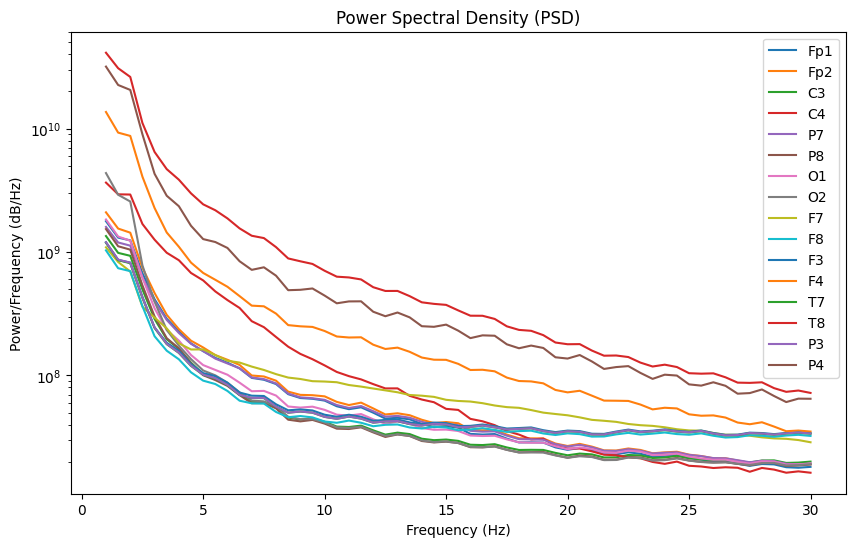

In [62]:
plot_psd_features(psd_features, freqs, ch_names)

In [53]:
import mne

eeg_data = epochs.get_data()

condition_ranges = {'lev1': (100/duration, 200/duration),
                    'lev2': (280/duration, 380/duration),
                    'lev3': (420/duration, 520/duration)}

epochs_by_condition = {}
selected_epochs = []

for condition, (start_epoch, end_epoch) in condition_ranges.items():
    start_epoch = int(start_epoch)
    end_epoch = int(end_epoch)
    condition_epochs = epochs[start_epoch:end_epoch+1].copy()
    epochs_by_condition[condition] = condition_epochs
    selected_epochs.append(condition_epochs)

selected_epochs = mne.concatenate_epochs(selected_epochs)

for condition, epoch_data in epochs_by_condition.items():
    num_epochs = len(epoch_data)
    print(f"Number of epochs for {condition}: {num_epochs}")

print(f"Total number of selected epochs: {len(selected_epochs)}")


Using data from preloaded Raw for 271 events and 240 original time points ...
Using data from preloaded Raw for 51 events and 240 original time points ...
Using data from preloaded Raw for 51 events and 240 original time points ...
Using data from preloaded Raw for 51 events and 240 original time points ...
Not setting metadata
153 matching events found
No baseline correction applied
Number of epochs for lev1: 51
Number of epochs for lev2: 51
Number of epochs for lev3: 51
Total number of selected epochs: 153


In [54]:

condition_of_interest = 'lev1'
epoch_array_for_condition = epochs_by_condition[condition_of_interest]
print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")


Using data from preloaded Raw for 51 events and 240 original time points ...
Epoch array shape for condition lev1: (51, 16, 240)


In [55]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = selected_epochs.get_data(copy=True)
y = np.concatenate([np.full(len(epochs), i) for i, epochs in enumerate(epochs_by_condition.values())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=5000)
model.fit(X_train.reshape(len(X_train), -1), y_train)

y_pred = model.predict(X_test.reshape(len(X_test), -1))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators= 175, random_state=42)  # Increased n_estimators for better performance
rf_model.fit(X_train.reshape(len(X_train), -1), y_train)

y_pred_rf = rf_model.predict(X_test.reshape(len(X_test), -1))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 1.0


In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train.reshape(len(X_train), -1), y_train)

# Predict labels on the test set
y_pred_gb = gb_model.predict(X_test.reshape(len(X_test), -1))

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)


Gradient Boosting Accuracy: 1.0


In [58]:
import tensorflow as tf
import keras
from keras import layers

# Get the shape of the input data used for GradientBoostingClassifier
input_shape_gb = X_train.shape[1:]  # Assuming X_train is the input data for GradientBoostingClassifier

# Define the number of classes
num_classes = 3  # Example: If you have 3 classes (lev1, lev2, lev3)

# Define the CNN architecture with input shape obtained from GradientBoostingClassifier
model_cnn = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape_gb),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the CNN model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model
model_cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


ValueError: Input 0 of layer "conv2d_2" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 16, 240)